In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
xtrain[1].shape

(28, 28)

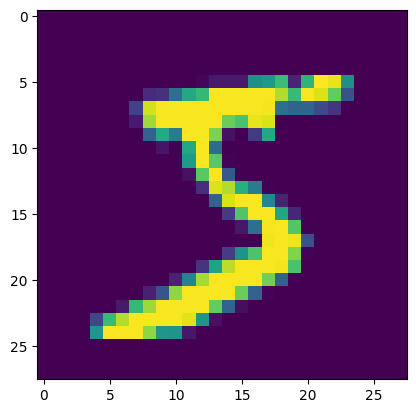

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0])

In [ ]:
xtrain=xtrain/255
xtest=xtest/255
xtrain[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain,ytrain,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0142 - accuracy: 0.9964 - val_loss: 0.1190 - val_accuracy: 0.9711
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0141 - accuracy: 0.9963 - val_loss: 0.1199 - val_accuracy: 0.9727
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0134 - accuracy: 0.9966 - val_loss: 0.1228 - val_accuracy: 0.9729
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.1306 - val_accuracy: 0.9713
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0121 - accuracy: 0.9971 - val_loss: 0.1224 - val_accuracy: 0.9728
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.1266 - val_accuracy: 0.9710
Epoch 7/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0112 - accuracy: 0.9970 - val_loss: 0.1235 - val_accurac

In [ ]:
yprob=model.predict(xtest)
print(yprob)
ypred=yprob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step
[[1.91957951e-12 4.06116156e-12 4.63577550e-07 ... 9.99963105e-01
  2.79434698e-08 1.95253688e-06]
 [6.67823435e-12 1.22093036e-06 9.99998748e-01 ... 1.91464479e-13
  9.11309765e-13 1.53872842e-23]
 [6.92848744e-07 9.99486029e-01 5.10489408e-05 ... 1.07647844e-04
  3.44063679e-04 1.31456375e-08]
 ...
 [2.32374870e-22 3.03820342e-16 1.62047784e-19 ... 1.85061422e-09
  6.14747697e-11 1.32550895e-07]
 [5.27268042e-18 8.18881594e-12 2.57428099e-18 ... 1.93536573e-17
  8.23915158e-09 1.41478043e-13]
 [8.05750300e-10 1.11129374e-17 1.56798824e-10 ... 2.14165970e-23
  1.76720368e-12 1.34975196e-19]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,ypred)

0.9711

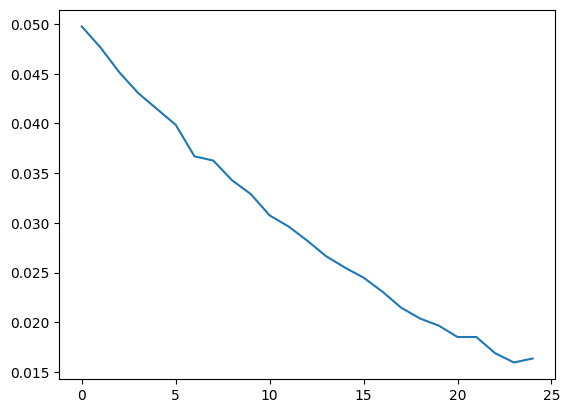

In [ ]:
plt.plot(history.history['loss'])

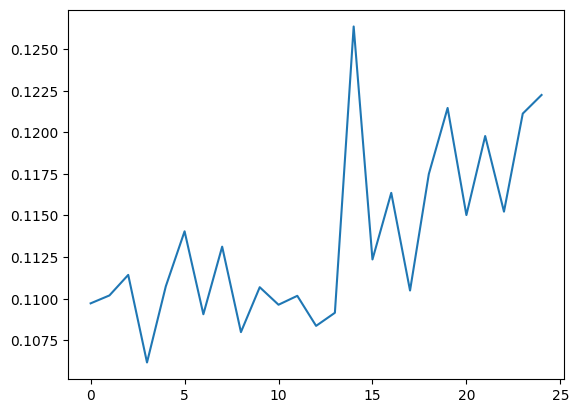

In [ ]:
plt.plot(history.history['val_loss'])

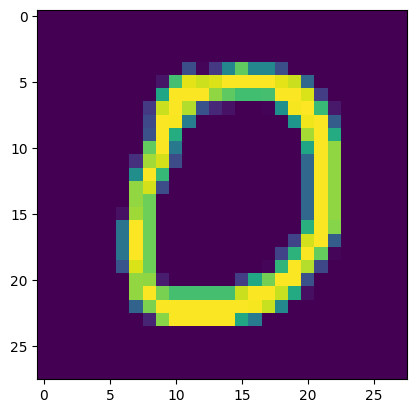

In [ ]:
plt.imshow(xtest[10])

In [ ]:
model.predict(xtest[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([0])